# Lab Customer Analysis Round 5 ~7

## **Processing Data**

1. One Hot/Label Encoding (categorical).
2. Concat DataFrames
3. Train-test split.: X-y split. 
4. Feature scaling - Normalize (numerical). 
5. Apply linear regression.
6. Model Validation
    - R2.
    - MSE.
    - RMSE.
    - MAE.
7. Model improvement
    - 7-1. Log scaling (with outliers)
    - 7-2. Removing outliers (no logscaling)
    - 7-3. Removing outlier + log scaling
    
    

In [915]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [916]:
df = pd.read_csv('/Users/dooinnkim/ironhack_da_may_2023/lab-customer-analysis-round-5/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [917]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [918]:
df.shape

(9134, 24)

In [919]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [920]:
df.columns = [column.lower().replace(' ', '_') for column in df.columns]

In [921]:
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [922]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

In [923]:
df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

## 1. One Hot/Label Encoding (categorical).

In [924]:
df_oneHotCoding = df.copy()
df_dummy = df.copy()



In [925]:
list(df_dummy.columns)
 

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [926]:
list(df_oneHotCoding.columns)

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [927]:
# exclude customer and effective_to_date
model_sample1 = ['state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

# multicollinearlity and negative correlated features removed ('number_of_policies', 'number_of_open_complaints', 'income')
model_sample2 = ['state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

df_oneHotCoding=df_oneHotCoding[model_sample1]
df_dummy=df_dummy[model_sample1]



In [928]:
df_oneHotCoding.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [929]:
list(df_oneHotCoding.select_dtypes("object"))

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [930]:
encoder = OneHotEncoder(drop='first')

categorical_var = list(df_oneHotCoding.select_dtypes("object"))

encoder.fit(df_oneHotCoding[categorical_var])

cols = []
for i in range(len(categorical_var)):
    cols += list(encoder.categories_[i][1:])


df_encoded = pd.DataFrame(encoder.transform(df_oneHotCoding[categorical_var]).todense(), columns=cols, index=df_oneHotCoding.index)




In [931]:
# if using get_dummies for Encoding

df_dummy = pd.get_dummies(df_dummy, drop_first=True)

In [932]:
df_dummy.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,1,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,1,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,0,0,0,0,0,0,0,1,0


## 2. Concat DataFrames

In [933]:
df_oneHotCoding.drop(categorical_var, axis=1, inplace=True)

df_oneHotCoding = pd.concat([df_oneHotCoding, df_encoded], axis=1)

In [934]:
df_oneHotCoding.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,California,Nevada,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,6979.535903,0,94,13,42,0,8,1131.464935,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12887.431650,48767,108,18,38,0,2,566.472247,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,7645.861827,0,106,18,65,0,7,529.881344,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2813.692575,43836,73,12,44,0,1,138.130879,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 3. X-y split. 

In [935]:
X = df_dummy.drop(['total_claim_amount'], axis=1)
y = df_dummy['total_claim_amount']

# X = df_oneHotCoding.drop(['total_claim_amount'], axis=1)
# y = df_oneHotCoding['total_claim_amount']

In [936]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [937]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
434,5015.009472,48567,130,12,15,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4641,5149.301306,26877,131,5,2,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4952,4904.894731,12902,139,3,51,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1489,8510.525936,0,121,5,94,0,8,0,0,0,...,1,0,0,0,0,0,1,0,1,0
812,3278.531880,70247,83,13,19,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,7334.328083,87957,61,31,63,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5191,5498.940679,22520,73,17,64,0,3,1,0,0,...,1,0,0,0,0,0,0,0,1,0
5390,8992.779137,0,129,13,4,0,7,1,0,0,...,0,1,0,0,0,1,0,0,1,0
860,14635.451580,0,139,5,56,0,2,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## 4. Feature scaling - Normalize (numerical)

In [938]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Apply linear regression.

In [939]:
# Start the model object:
lm = LinearRegression()

# Fit the model object on the training set:
lm.fit(X_train_scaled, y_train)

LinearRegression()

## 6. Model Validation

In [940]:
# Get predictions for the test set:
predictions = lm.predict(X_test_scaled)
# Calculate your metrics:
rmse = mean_squared_error(y_test, predictions, squared=False) # or mse with squared=True
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions),2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.77
RMSE: 138.50053189097795
MAE: 94.52122056417772


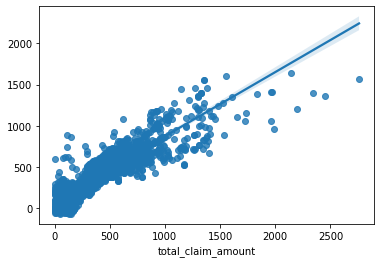

In [941]:
sns.regplot(x=y_test, y=predictions)

In [963]:
predicted_df = pd.DataFrame({'actual':y_test, 'predicted':predictions, 'difference':y_test-predictions})
predicted_df.head()

,actual,predicted,difference
4068,416.261800,5.915175,410.346625
1752,95.925021,4.156067,91.768954
7105,295.871784,5.492194,290.379590
8848,32.714226,4.274154,28.440072
3506,478.751065,6.043465,472.707600


## 7. Improving the model

### 7-1. Improve Method 1: log scaling (with outliers)

In [942]:
# Log scaling makes less skwed and more normalized
y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


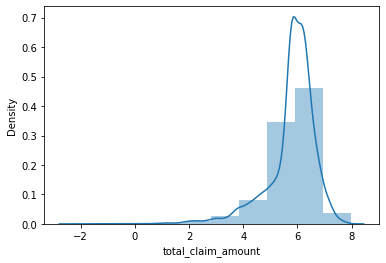

In [943]:
# Check skewness after log scaled
sns.distplot(y_train_scaled, bins=10)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


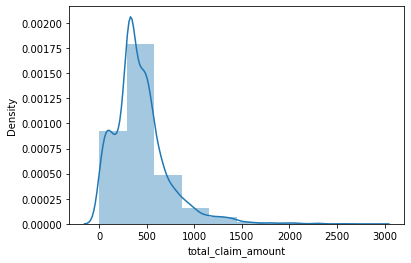

In [944]:
sns.distplot(y_train, bins=10)

In [945]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train_scaled)

predictions = lm.predict(X_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2)) 



y_test_unscaled = y_test_scaled.apply(lambda x: np.exp(x))
predictions_unscaled = pd.Series(predictions).apply(lambda x: np.exp(x))

rmse = mean_squared_error(y_test_unscaled, predictions_unscaled, squared=False)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)

print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.73
RMSE: 130.64452834384423
MAE: 85.52775190023164


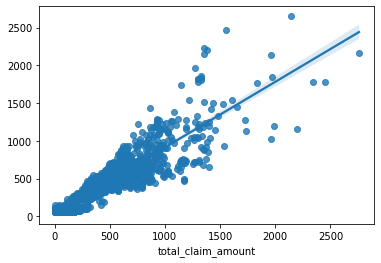

In [946]:
sns.regplot(x=y_test_unscaled, y=predictions_unscaled)

### 7-2. Improve Method 2: Removing Outlieres (no log scaled)

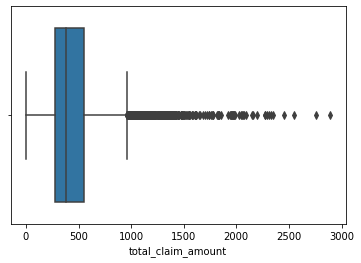

In [947]:
sns.boxplot(x=df_dummy["total_claim_amount"])

In [948]:
# To calculate the exact outliers range:

IQR = abs(np.quantile(df_dummy["total_claim_amount"], .25) - np.quantile(df_dummy["total_claim_amount"], .75)) * 1.5
lower_boundary = np.quantile(df_dummy["total_claim_amount"], .25) - IQR
upper_boundary = np.quantile(df_dummy["total_claim_amount"], .75) + IQR

# Outliers for this column are values smaller than lower_boundary or bigger than upper_boundary:
lower_boundary, upper_boundary

(-140.62664687500018, 960.3997301250002)

In [949]:
df_outliers= df_dummy[(df_dummy["total_claim_amount"] > 960.3997301250002) | (df_dummy["total_claim_amount"] < -140.62664687500018)].sort_values("total_claim_amount")
df_outliers.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_California,state_Nevada,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
7341,14429.892840,0,198,4,31,0,9,962.159318,0,0,...,0,0,0,1,0,0,0,0,0,1
3904,2840.899849,0,80,3,99,1,1,962.526106,0,0,...,1,0,0,0,0,0,0,1,1,0
5951,7559.206998,0,119,33,58,1,3,964.515980,0,0,...,0,1,0,0,0,0,0,0,0,1
8086,4949.389491,0,134,15,3,0,1,964.800000,1,0,...,1,0,0,0,0,0,1,0,0,1
4221,9624.938903,0,134,26,88,0,4,964.800000,0,1,...,0,0,0,0,0,1,0,0,1,0


In [950]:
df_no_outliers = df_dummy[df_dummy["total_claim_amount"] < 960.3997301250002]

numerical_columns = df_no_outliers.select_dtypes("number")

In [951]:
# To check the outliers range
print("max:", df_no_outliers['total_claim_amount'].max())
print("mean:", df_no_outliers['total_claim_amount'].mean())
print("median:", df_no_outliers['total_claim_amount'].median())
print("min:", df_no_outliers['total_claim_amount'].min())

max: 960.115399
mean: 390.03496301911986
median: 364.8
min: 0.09900700000000001


In [952]:
# Assuming df_no_outliers is defined and correctly prepared
X = df_no_outliers.drop(['total_claim_amount'], axis=1)
y = df_no_outliers['total_claim_amount']

# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#X scale - prevent data leakage
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

# Test the model:
predictions = lm.predict(X_test_scaled)
print("R2_score:", round(r2_score(y_test, predictions), 2))


rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print("RMSE:", rmse)
print("MAE:", mae)


R2_score: 0.78
RMSE: 99.74594764689826
MAE: 75.67697547212246


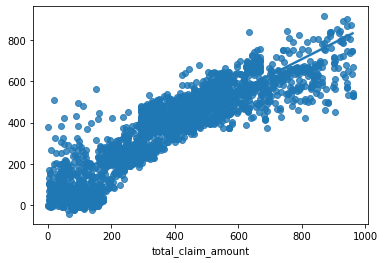

In [953]:
sns.regplot(x=y_test, y=predictions)

### 7-3. Improve Method 3: Removing Outlieres (with log scaled)

In [954]:

y_train_scaled = y_train.apply(lambda x: np.log(x) if x > 0 else 0)
y_test_scaled = y_test.apply(lambda x: np.log(x) if x > 0 else 0)


In [955]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train_scaled)

predictions = lm.predict(X_test_scaled)
print("R2_score:", round(r2_score(y_test_scaled, predictions), 2)) 

y_test_unscaled = y_test_scaled.apply(lambda x: np.exp(x))
predictions_unscaled = pd.Series(predictions).apply(lambda x: np.exp(x))

rmse = mean_squared_error(y_test_unscaled, predictions_unscaled, squared=False)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)

print("RMSE:", rmse)
print("MAE:", mae)



R2_score: 0.72
RMSE: 97.92833975956628
MAE: 72.2769795880611


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


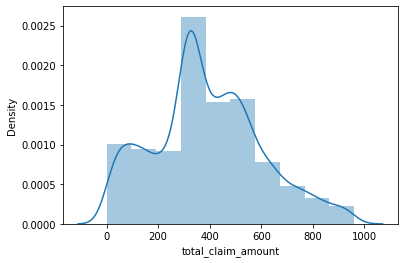

In [956]:
sns.distplot(y_train, bins=10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


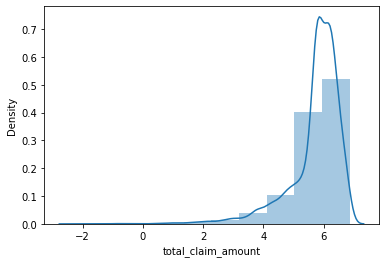

In [957]:
sns.distplot(y_train_scaled, bins=10)

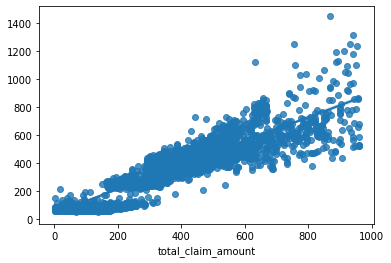

In [958]:
sns.regplot(x=y_test_unscaled, y=predictions_unscaled)

**Method 0.Original**
- R2_score: 0.77
- RMSE: 138.50053189097795
- MAE: 94.52122056417772

**Method 1.Log scaled with outliers**
- R2_score: 0.73
- RMSE: 130.64452834384423
- MAE: 85.52775190023164

**Method 2.Removed outliers (no log scaled)**
- R2_score: 0.78
- RMSE: 99.74594764689826
- MAE: 75.67697547212246


**Method 3.Removed outliers (with log scaled)**
- R2_score: 0.72
- RMSE: 97.92833975956628
- MAE: 72.2769795880611

**Conlusion: "Method2. Removed outliers (no log scaled)" is the strongest model**
